In [67]:
#As per - https://www.kaggle.com/code/faridrizqis/hertdisease-eda-prediction
# Dimensionality Reduction - https://www.kaggle.com/code/mahmoudlimam/undersampling-dimensionality-reduction
# Over/Under Sampling - https://www.kaggle.com/code/mahmoudlimam/resampling-tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [68]:
df = pd.read_csv('../data/heart_disease_health_indicators_BRFSS2021.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234627 entries, 0 to 234626
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   HeartDiseaseOrAttack         234627 non-null  float64
 1   HighBP                       234627 non-null  float64
 2   HighChol                     234627 non-null  float64
 3   CholCheckLast5Years          234627 non-null  float64
 4   BMI                          234627 non-null  float64
 5   Smoker                       234627 non-null  float64
 6   Stroke                       234627 non-null  float64
 7   Diabetes                     234627 non-null  float64
 8   PhysActivityLast30Days       234627 non-null  float64
 9   FruitsPerDay                 234627 non-null  float64
 10  DarkGreensPerDay             234627 non-null  float64
 11  PotatoesPerDay               234627 non-null  float64
 12  OtherVegPerDay               234627 non-null  float64
 13 

In [69]:
df.isnull().sum()

HeartDiseaseOrAttack           0
HighBP                         0
HighChol                       0
CholCheckLast5Years            0
BMI                            0
Smoker                         0
Stroke                         0
Diabetes                       0
PhysActivityLast30Days         0
FruitsPerDay                   0
DarkGreensPerDay               0
PotatoesPerDay                 0
OtherVegPerDay                 0
HeavyDrinker                   0
AnyHealthcare                  0
CantAffordHealthcare           0
GeneralHealth                  0
BadMentalHealthLast30Days      0
BadPhysicalHealthLast30Days    0
DiffWalking                    0
Sex                            0
AgeGroup                       0
HighestEducation               0
IncomeGroup                    0
HighBPMeds                     0
CholMeds                       0
DiabetesAge                    0
dtype: int64

In [70]:
df.columns

Index(['HeartDiseaseOrAttack', 'HighBP', 'HighChol', 'CholCheckLast5Years',
       'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivityLast30Days',
       'FruitsPerDay', 'DarkGreensPerDay', 'PotatoesPerDay', 'OtherVegPerDay',
       'HeavyDrinker', 'AnyHealthcare', 'CantAffordHealthcare',
       'GeneralHealth', 'BadMentalHealthLast30Days',
       'BadPhysicalHealthLast30Days', 'DiffWalking', 'Sex', 'AgeGroup',
       'HighestEducation', 'IncomeGroup', 'HighBPMeds', 'CholMeds',
       'DiabetesAge'],
      dtype='object')

In [71]:
df.sample(5)

,HeartDiseaseOrAttack,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,Diabetes,PhysActivityLast30Days,FruitsPerDay,...,BadMentalHealthLast30Days,BadPhysicalHealthLast30Days,DiffWalking,Sex,AgeGroup,HighestEducation,IncomeGroup,HighBPMeds,CholMeds,DiabetesAge
51663,0.0,1.0,0.0,1.0,42.91,1.0,0.0,0.0,1.0,0.10,...,14.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,0.0
92551,0.0,1.0,0.0,1.0,25.77,1.0,0.0,0.0,1.0,1.00,...,0.0,0.0,0.0,1.0,11.0,6.0,7.0,1.0,0.0,0.0
63078,0.0,0.0,0.0,1.0,33.82,0.0,0.0,0.0,1.0,0.71,...,2.0,0.0,0.0,1.0,6.0,5.0,10.0,0.0,0.0,0.0
37933,0.0,1.0,1.0,1.0,31.00,0.0,0.0,0.0,1.0,0.43,...,0.0,3.0,0.0,0.0,9.0,5.0,7.0,1.0,0.0,0.0
94604,0.0,1.0,1.0,1.0,24.56,1.0,0.0,0.0,1.0,2.00,...,2.0,0.0,0.0,0.0,12.0,6.0,6.0,1.0,0.0,0.0


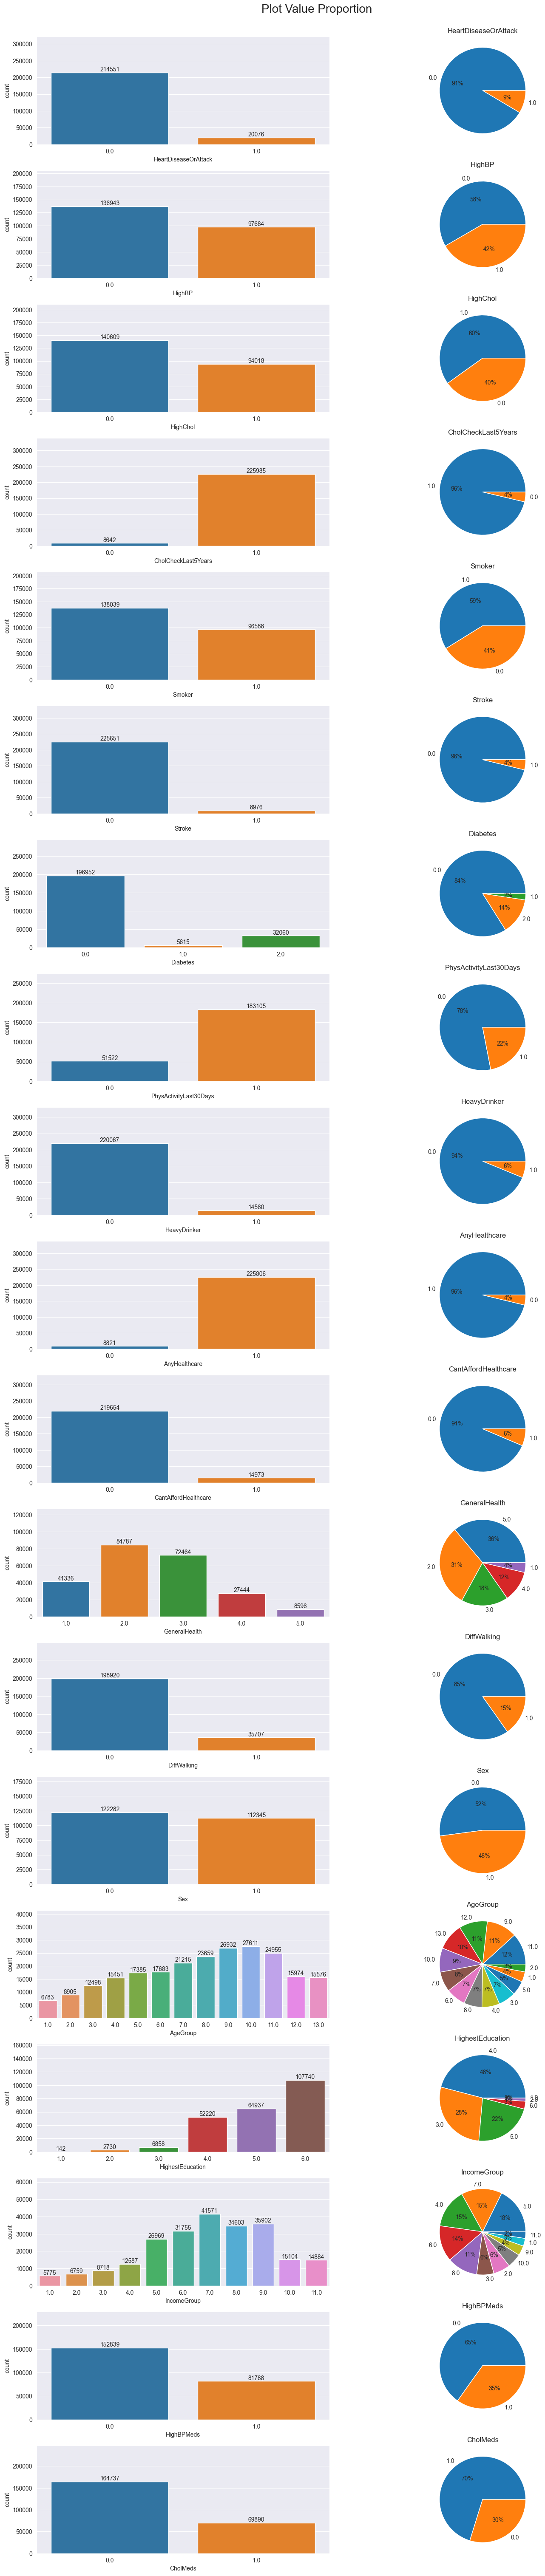

In [72]:
nonCatCol = ['DiabetesAge', 'FruitsPerDay', 'DarkGreensPerDay', 'PotatoesPerDay', 'OtherVegPerDay', 'BadMentalHealthLast30Days', 'BadPhysicalHealthLast30Days', 'BMI']

#Categorical

catcol = [x for x in df.columns if x not in nonCatCol]

plt.figure(figsize=(15,120))
for i,column in enumerate(catcol):
    plt.subplot(len(2*catcol), 2, (2*i)+1)
    plt.suptitle("Count Categorical Data", fontsize=20, x=0.5, y=1)

    ax = sns.countplot(data=df, x=column)
    ax.bar_label(ax.containers[0])
    ax.margins(y=0.5)

    plt.subplot(len(2*catcol), 2, (2*i)+2)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')

    plt.title(f"{column}")
    plt.tight_layout()

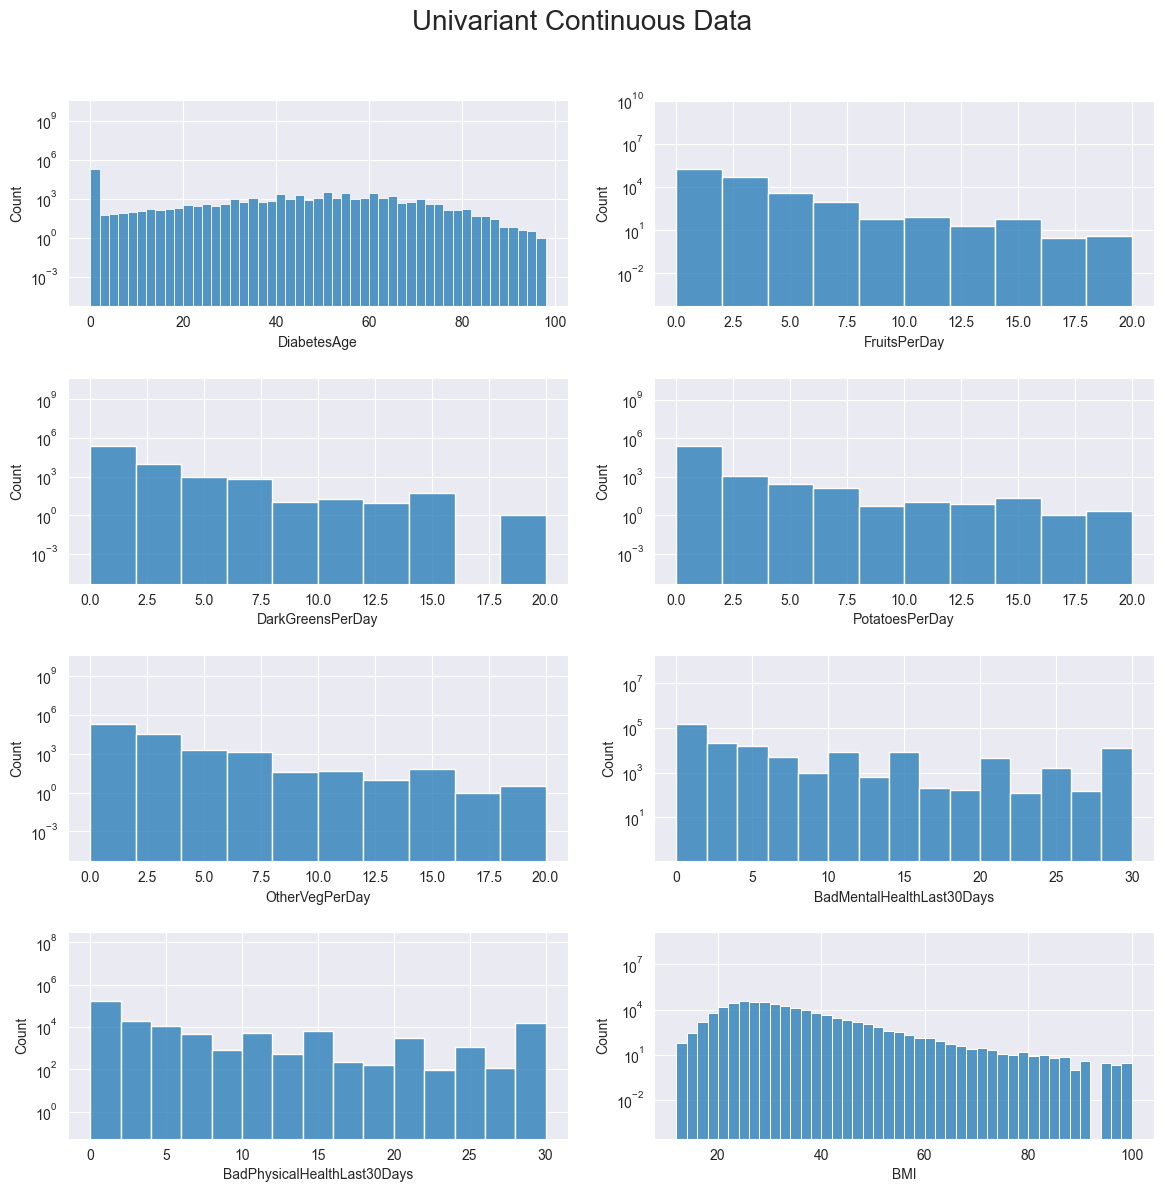

In [148]:
#Non-Categorical
plt.figure(figsize=(12,12))
for i,column in enumerate(nonCatCol):
    plt.suptitle("Univariant Continuous Data", fontsize=20, x=0.5, y=1)
    binwidth = 2

    plt.subplot(len(nonCatCol)//2, 2, i+1)
    data = df[column]

    plt.yscale("log")

    ax = sns.histplot(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    ax.margins(y=1)

    #plt.title(f"{column}")
    plt.tight_layout(pad=2.0)

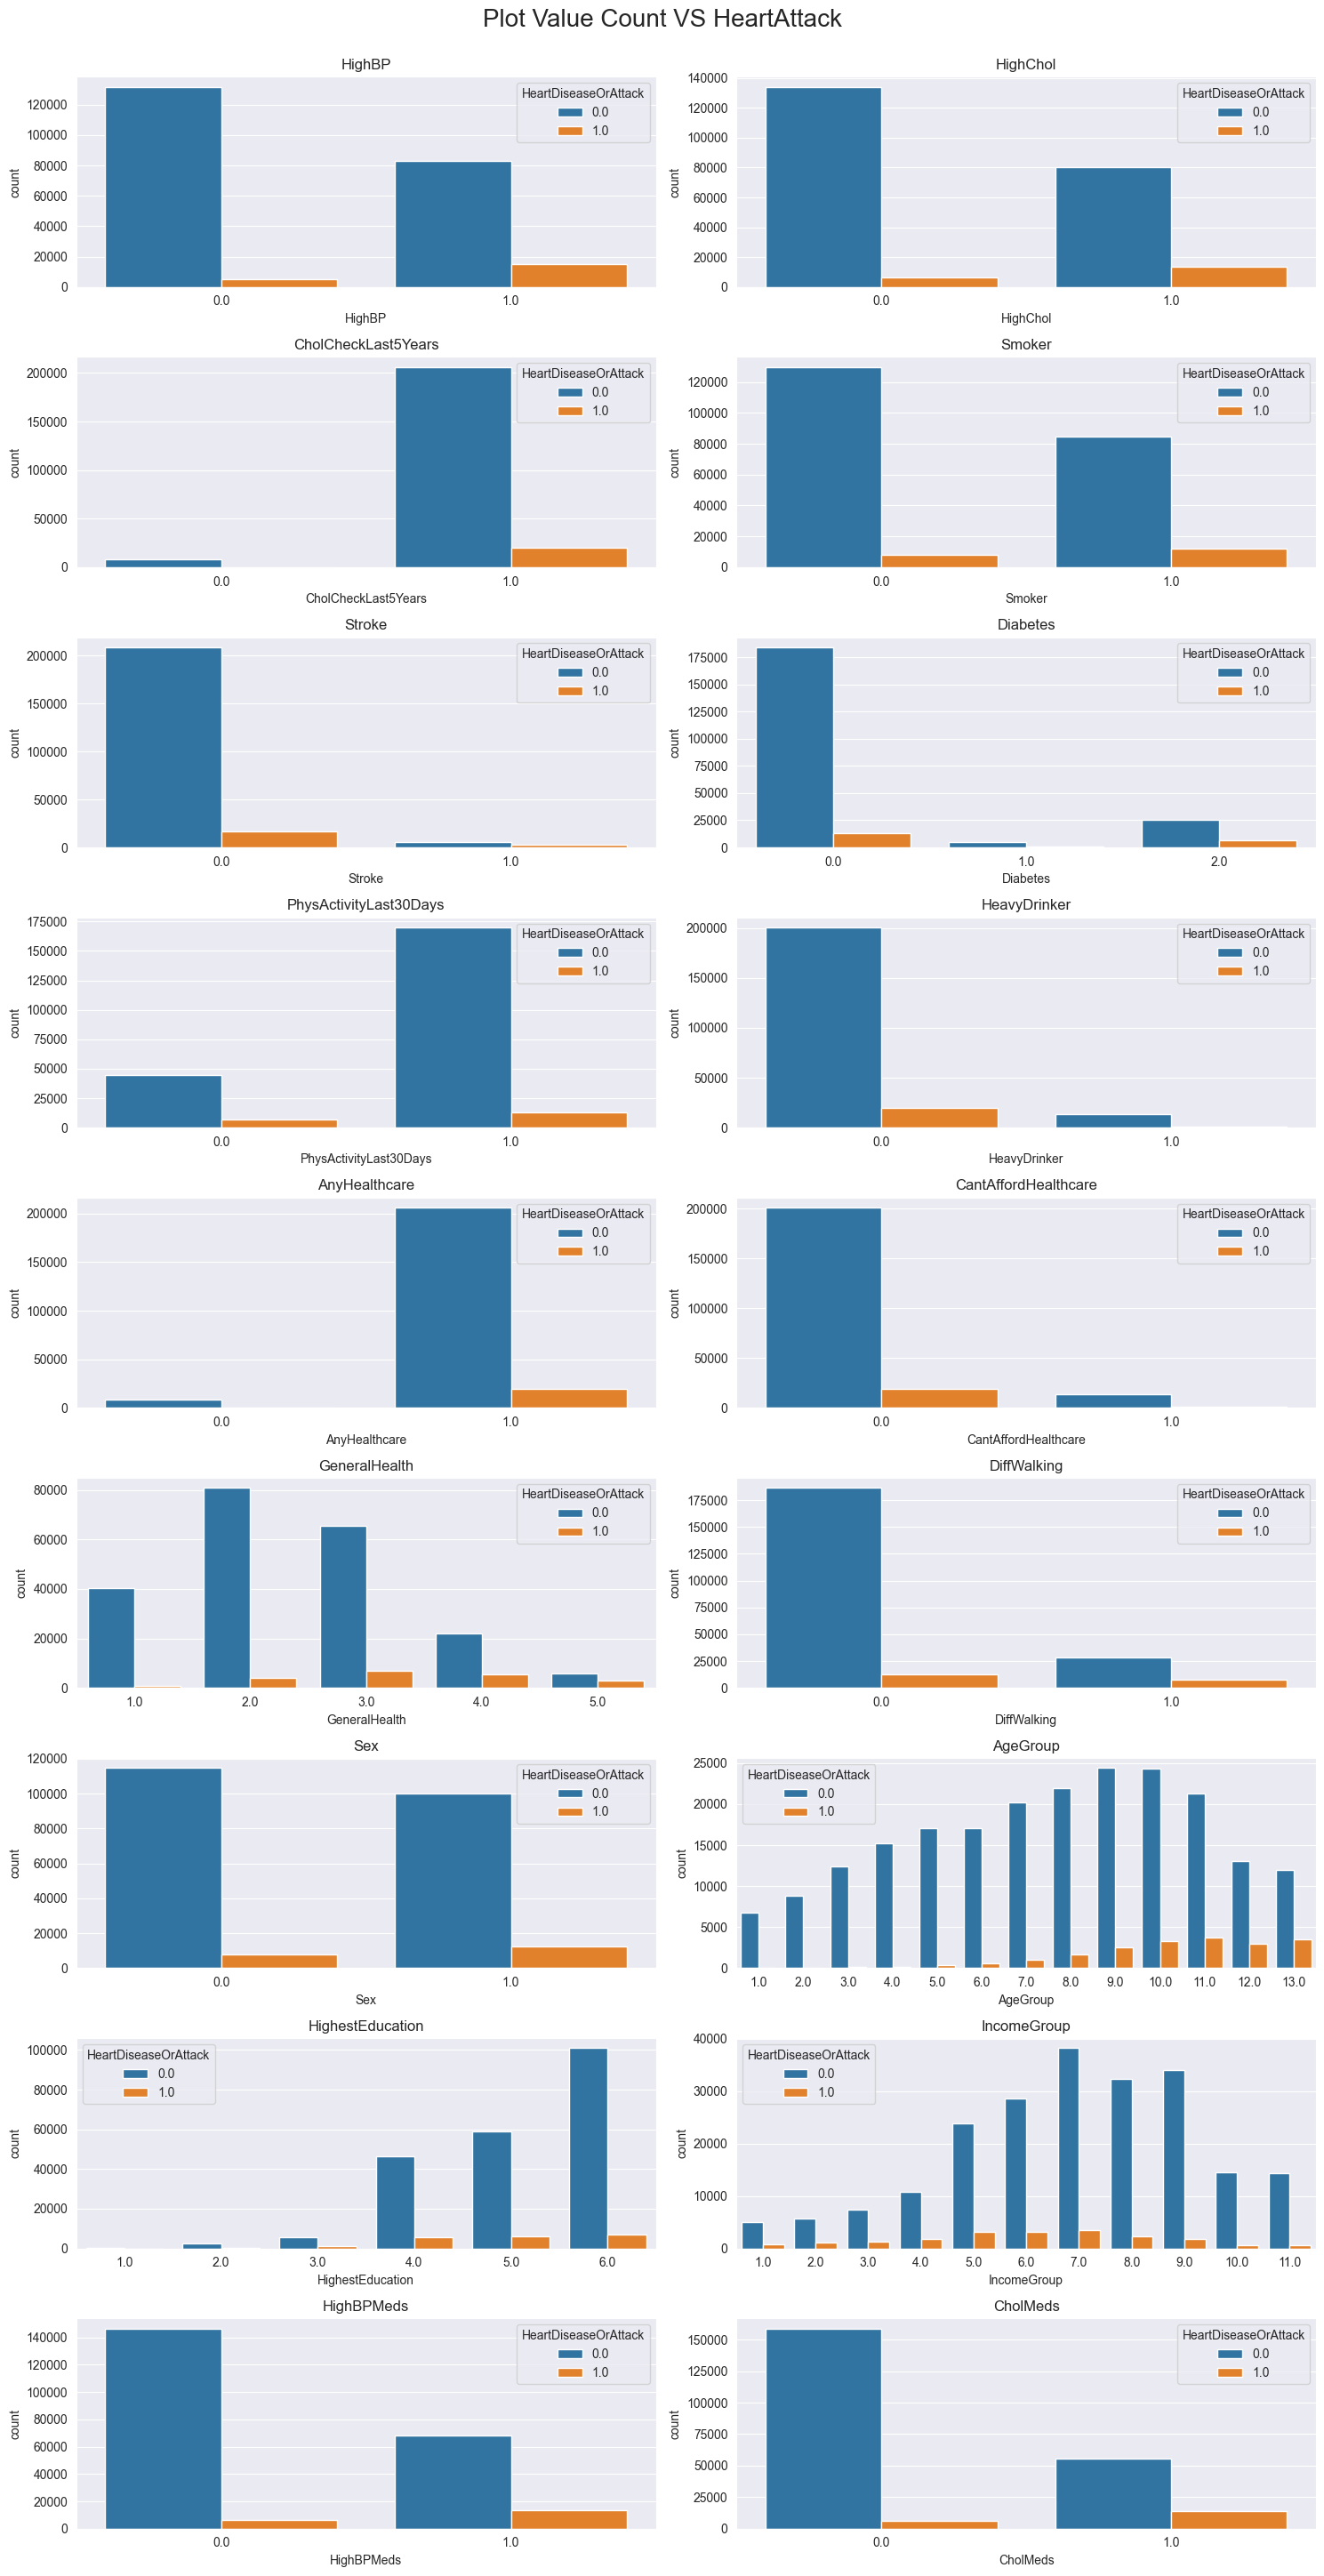

In [150]:
# Bi Variant
plt.figure(figsize=(15,60))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseOrAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
#From above we can see those with HeartDiseaseOrAttack have:
# - Use CholMeds More
# - Have HighBPMeds
# - Slightly more likely to be male
# - Are likely to be older
# - Are a smoker

In [ ]:
# Multi Variant Analysis